# Dicom file manipulation with the Pydicom Library
https://pydicom.github.io/

## Contents:
* Reading Dicom files (general)
* Changing Dicom tags
* Modifying Dicom images
* Reading Dicom CT image files
* Reading Dicom RT Plan files

###  Architecture of DICOM :
https://dicom.innolitics.com/ciods

# Reading Dicom files (general)

## Exemple with a Nuclear Medicine imaging (SPECT) Dicom

In [1]:
import numpy as np
import numpy.ma as ma
import pydicom as dcm
import ipywidgets as ipw
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
from glob import glob
# %matplotlib inline

In [2]:
# open dicom file (works for all .dcm file)
File = dcm.read_file('data/patient_SPECT.dcm')
print(File)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 224
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Nuclear Medicine Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.6.1.68089.30900111062915055740600000002
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'VEPRO100'
(0002, 0100) Private Information Creator UID     UI: LUDODICOM
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TOMO', 'EMISSION']
(0008, 0016) SOP Class UID                       UI: Nuclear Medicine Ima

## Acces to Dicom data by sequence name 

In [3]:
print('Image type :',  File.ImageType )
print('Image type first element :', File.ImageType[0])
print('Modality: ',  File.Modality)
print()
# Type of data
# Note that they are all string, so you need a conversion to (float, int...)
print('type of ImageType dicom sequence : ', type(File.ImageType))
print('type of first element of ImageType dicom sequence : ', type(File.ImageType[0]))
print()
pixelSpacing = File.PixelSpacing
print('pixel spacing :', pixelSpacing)
print('length pixel spacing sequence :', len(pixelSpacing))
print('type pixel spacing :', type(pixelSpacing[0]))

Image type : ['ORIGINAL', 'PRIMARY', 'TOMO', 'EMISSION']
Image type first element : ORIGINAL
Modality:  NM

type of ImageType dicom sequence :  <class 'pydicom.multival.MultiValue'>
type of first element of ImageType dicom sequence :  <class 'str'>

pixel spacing : [4.7951998710632, 4.7951998710632]
length pixel spacing sequence : 2
type pixel spacing : <class 'pydicom.valuerep.DSfloat'>


In [4]:
# Search dicom sequence with 'name' chain
print(File.dir('name'))

['InstitutionName', 'ManufacturerModelName', 'OperatorsName', 'PatientName', 'ProtocolName', 'ReferringPhysicianName', 'StationName']


## Acces to Dicom data by tag (hexadecimal)

In [5]:
# print 'Detector Information Sequence' dicom sequence 
print(File[0x054, 0x022])

# print 'Radialposition' First sub sequence of 'Detector Information Sequence' dicom sequence
print(File[0x054, 0x022][0][0x018, 0x1142].value)

(0054, 0022) Detector Information Sequence       SQ: <Sequence, length 2>
[246.19999694824, 244.60000610352, 236.30000305176, 229.19999694824, 221.19999694824, 210.30000305176, 204.5, 204.5, 210.30000305176, 223.60000610352, 244.19999694824, 264.10000610352, 281.30001831055, 295.70001220703, 307.10000610352, 315, 324, 328.60000610352, 331.10000610352, 331.10000610352, 331.10000610352, 331.10000610352, 325.5, 317.5, 305.89999389648, 291, 276.60000610352, 259, 237.10000610352, 216.10000610352, 198, 173.80000305176]


In [6]:
list_0 = File[0x054, 0x022][0][0x018, 0x1142].value
list_1 = File[0x054, 0x022][1][0x018, 0x1142].value
# Note the loop to convert string into float into the 'list' pos_radial_0
pos_radial_0 = [float(val) for val in list_0]
pos_radial_1 = [float(val) for val in list_1]

# pos_radial_0 = []
# for val in list_0:
#     pos_radial_0.append(float(val))

# concatenate 2 lists:
pos_radial = pos_radial_1 + pos_radial_0
print(pos_radial)

[171.5, 171.5, 171.5, 180.19999694824, 201.60000610352, 221.10000610352, 237.69999694824, 252.80000305176, 265.70001220703, 277.0, 290.10000610352, 296.80001831055, 302.39999389648, 306.80001831055, 306.80001831055, 306.80001831055, 306.80001831055, 306.80001831055, 298.60000610352, 287.20001220703, 275.30001831055, 262.10000610352, 251.30000305176, 243.10000610352, 242.30000305176, 242.30000305176, 242.30000305176, 244.69999694824, 247.40000915527, 247.40000915527, 247.40000915527, 247.40000915527, 246.19999694824, 244.60000610352, 236.30000305176, 229.19999694824, 221.19999694824, 210.30000305176, 204.5, 204.5, 210.30000305176, 223.60000610352, 244.19999694824, 264.10000610352, 281.30001831055, 295.70001220703, 307.10000610352, 315.0, 324.0, 328.60000610352, 331.10000610352, 331.10000610352, 331.10000610352, 331.10000610352, 325.5, 317.5, 305.89999389648, 291.0, 276.60000610352, 259.0, 237.10000610352, 216.10000610352, 198.0, 173.80000305176]


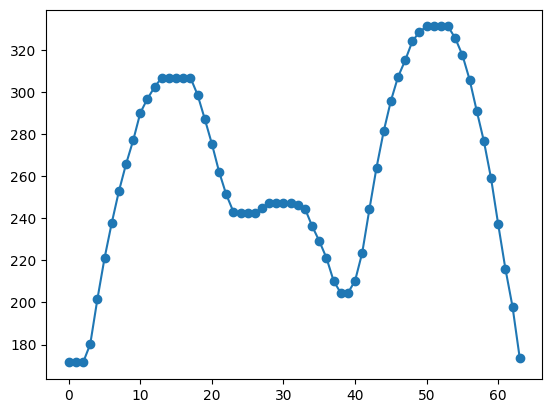

In [7]:
# plot the positions
plt.figure()
plt.plot(pos_radial, 'o-', label='detecteur 1+2');
plt.show()

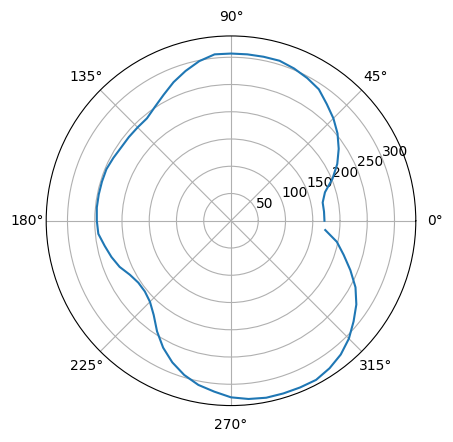

In [8]:
# this polar plot with the same values describes camera trajectory surronding patient
plt.figure()
plt.polar([2*np.pi*l/64 for l in range(64)], pos_radial);
plt.show()

## Exercise - Creation of a dictionary on the  Energy Windows (there are 5)
* search for the energy keyword in the tags
* find the tag on energy windows and the information on the lower and higher limit
* buid a dictionnary with the pic energy name as key and low, high and width as values

In [33]:
print(File[0x054, 0x012][0])
print(File[0x054, 0x012][1])
print(File[0x054, 0x012][2])
print(File[0x054, 0x012][3])
print(File[0x054, 0x012][4])
print("**************************************")

for i in range(5):
    print(float(File[0x054, 0x012][i][0x054, 0x013][0][0x054, 0x014].value))
    print(float(File[0x054, 0x012][i][0x054, 0x013][0][0x054, 0x015].value))
    print("=========================")

(0054, 0013)  Energy Window Range Sequence  1 item(s) ---- 
   (0054, 0014) Energy Window Lower Limit           DS: '228.47500610352'
   (0054, 0015) Energy Window Upper Limit           DS: '265.52499389648'
   ---------
(0054, 0018) Energy Window Name                  SH: '111 Indium'
(0054, 0013)  Energy Window Range Sequence  1 item(s) ---- 
   (0054, 0014) Energy Window Lower Limit           DS: '159.10000610352'
   (0054, 0015) Energy Window Upper Limit           DS: '184.89999389648'
   ---------
(0054, 0018) Energy Window Name                  SH: '111 Indium'
(0054, 0013)  Energy Window Range Sequence  1 item(s) ---- 
   (0054, 0014) Energy Window Lower Limit           DS: '203.77500915527'
   (0054, 0015) Energy Window Upper Limit           DS: '228.47500610352'
   ---------
(0054, 0018) Energy Window Name                  SH: 'Lower Scatter'
(0054, 0013)  Energy Window Range Sequence  1 item(s) ---- 
   (0054, 0014) Energy Window Lower Limit           DS: '133.30000305176'
  

In [10]:
dic = {}
for i in range(5):
    window_name = str(File[0x054, 0x012][i][0x054, 0x018].value)
    llimit = float(File[0x054, 0x012][i][0x054, 0x013][0][0x054, 0x015].value)
    ulimit = float(File[0x054, 0x012][i][0x054, 0x013][0][0x054, 0x014].value)
    dic[window_name] = [llimit, ulimit]
    
print(dic)

{'111 Indium': [184.89999389648, 159.10000610352], 'Lower Scatter': [159.10000610352, 133.30000305176], 'Upper Scatter': [198.66000366211, 184.89999389648]}


## Acces to Image pixel map

In [11]:
# Acces to image pixel data 
arr_image = File.pixel_array
print(type(arr_image))
print('Image Dimension: ', File.pixel_array.shape)
print(File.pixel_array.min(), File.pixel_array.max(), File.pixel_array.mean())

<class 'numpy.ndarray'>
Image Dimension:  (320, 128, 128)
0 689 3.4655183792114257


In [12]:
def plot_image(myslice):
    min_val_disp = arr_image[arr_image>0].min()
    plt.figure(figsize=[8, 6])
    plt.imshow(ma.masked_less_equal(arr_image[myslice, :, :], min_val_disp), cmap='hot', vmin=min_val_disp, vmax=arr_image.max())
    plt.colorbar()
    plt.show()
    return;


ipw.interact(plot_image, myslice=(0, arr_image.shape[0]-1));

interactive(children=(IntSlider(value=159, description='myslice', max=319), Output()), _dom_classes=('widget-i…

# Modifying Dicom files

## Changing Dicom tags

In [14]:
# Remove patient name
print(File.PatientName)
File.PatientName = 'PythonCourse'
print(File.PatientName)

DQPRM^optionnel
PythonCourse


## Changing the image data

In [15]:
# modify and save
print(File.pixel_array.min(), File.pixel_array.max(), File.pixel_array.mean())
File.pixel_array[File.pixel_array < 100] = 0
print(File.pixel_array.min(), File.pixel_array.max(), File.pixel_array.mean())

# the pixel values are contained in PixelData, pixel_array is an attribute from pydicom
# to store the new pixel values they need to be set as a string to PixelData
File.PixelData = File.pixel_array.tobytes()

0 689 3.4655183792114257
0 689 0.49348297119140627


## Saving Dicom file

In [16]:
File.save_as('output/patient_SPECT_modified.dcm')

# Reading Dicom CT image

In [17]:
def read_CT(path):
    # read all .dcm images and put them in a list slices
    slices = [dcm.read_file(file) for file in glob(path + '/*.dcm')]
    # sort the slices
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    # create a numpy matrix containing all slices
    ct = np.stack([s.pixel_array for s in slices], axis=-1)
    # Convert to Hounsfield units (HU)
    ct = ct * slices[0].RescaleSlope + slices[0].RescaleIntercept
    return ct

In [18]:
# subset of anonymized CT dicom sample from https://www.dicomlibrary.com
ct_image = read_CT('data/patient_CT_dcm/')
ct_image.shape

(512, 512, 26)

In [19]:
def plot_image(myslice):
    plt.figure(figsize=[8, 6])
    plt.imshow(ct_image[:, :, myslice], aspect='equal', vmin=ct_image.min(), vmax=ct_image.max(), cmap='bone')
    plt.colorbar()
    plt.show()
    return;

ipw.interact(plot_image, myslice=(0, ct_image.shape[2]-1));

interactive(children=(IntSlider(value=12, description='myslice', max=25), Output()), _dom_classes=('widget-int…

# Reading DICOM RT plan

#### DICOM input for GATE simulations:
* Beam level
    * Beam Delivery Type
    * Beam Type
    * Beam Radiation Type
    * Beam Energy
    * Beam Fluence Type
    * Direction Gantry Rotation
    * Direction Collimator Rotation
    * Collimator Rotation
    * Isocenter Position
    * Applicator ID (electron beam)
    * Applicator Type (electron beam)
    * Source Surface Distance (electron beam)
* Control Point Index
    * Gantry Angle
    * X Jaws Poistions
    * Y Jaws Positions
    * MLC Positions
    * Dose Rate
    
    


In [20]:
import pydicom as dcm

plan = dcm.read_file("data/patient_RP.dcm")
print(plan)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 166
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: RT Plan Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.246.352.71.5.950586737223.600402.20191022193004
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.7
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0012) Instance Creation Date              DA: '20191022'
(0008, 0013) Instance Creation Time              TM: '195729.348000'
(0008, 0016) SOP Class UID                       UI: RT Plan Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.246.352.71.5.950586737223.600402.20191022193004
(0008, 0020) Study Date                          DA: '20190219'
(0008, 0030) S

In [21]:
k=0
for beam in plan.BeamSequence:
    print('Beam Name: ', beam.BeamName)
    print('Beam Delivery Type: ', beam.BeamType)
    print('Beam Radiation Type: ', beam.RadiationType)
    print('Beam Energy: ', beam.ControlPointSequence[0].NominalBeamEnergy)
    print('Beam Fluence Mode: ', beam.PrimaryFluenceModeSequence[0].FluenceMode)
    print('Beam Treatment Delivery Type: ', beam.TreatmentDeliveryType)
    k+=1
    for control_index in beam.ControlPointSequence:
        print('Control Index: ', control_index.ControlPointIndex)
        print('     *Gantry Angle: ', control_index.GantryAngle)
        print('     *Dose Rate: ', control_index.ReferencedDoseReferenceSequence[0].CumulativeDoseReferenceCoefficient)
        print('     *MLC: ', control_index.BeamLimitingDevicePositionSequence[0].LeafJawPositions) # bug to fix control index 0 MLC vlaues seem wrong  
        print('========================')
        
print(k)

Beam Name:  Field 1
Beam Delivery Type:  DYNAMIC
Beam Radiation Type:  PHOTON
Beam Energy:  6
Beam Fluence Mode:  NON_STANDARD
Beam Treatment Delivery Type:  TREATMENT
Control Index:  0
     *Gantry Angle:  90
     *Dose Rate:  0
     *MLC:  [-27.5, 27.7]
Control Index:  1
     *Gantry Angle:  89.1964285714286
     *Dose Rate:  4.206203e-3
     *MLC:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28.2, 8.0e-1, 7.0e-1, -5.7, -12, -15, -14.5, -17.5, -17, -17, -17, -17, -17.5, -17, -17.2, 7.8, 6.8, 4.2, 6.0e-1, 1.8, -3.1, -2.9, -4.3, 28.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28.2, 3, 6.3, 12.5, 13.3, 15.8, 15.8, 17.5, 17.4, 17.5, 17.5, 16.4, -6.1, -12.3, -6.2, 17, 15.8, 13.6, 13.3, 10.8, 9.4, 5.4, 1.1, 28.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Control Index:  2
     *Gantry Angle:  87.5892857142857
     *Dose Rate:  1.2618609e-2
     *MLC:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,